In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import re

In [2]:
source = "C:/Users/bruno/Documents/DS/ds_blend_students_2020/TP1/properati.csv"

In [3]:
data = pd.read_csv(source)

In [4]:
data.head(2)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


In [4]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [5]:
regex = r"exp\w*\.?\s?\w*\s*(?:\d\/\d{2,4})?\w+?\s*\w*\s*\w*\s*\$?\s*(\b\d?\d\.?\,?\d[^1]\d\b)|\$?\s*(\b\d?\d\.?\,?\d[^1]\d\b)\s*\w*\s*\w*\s*exp\w"
pattern = re.compile(regex,re.IGNORECASE)
regex0 = r"exp\w+\s?\w+?\s?\w+?\s?\$?\s?(\d?\d?.?\d{3})|\$?\s?(\d?\d?.?\d{3})\s?\w+?\s?\w+?\s?exp\w+"
pattern0 = re.compile(regex0,re.IGNORECASE)
reg_num = r"(\d?\d\.?\,?\d{2,3})[^m2|x]"
pattern_num = re.compile(reg_num,re.IGNORECASE)

In [6]:
lista_prueba = [data.description[114],data.description[166]]
print(lista_prueba[0])
print()
print(lista_prueba[1])

buen dpto. de 3 ambientes frente a la plaza. Living comedor pisos de piedra laja, con balcon, toil, cocina con lavadero, 2 dormitorios con piso flotante, baÃ±o completo.cochera.expensas $ 2.890.-

Corredor Responsable: Mariano Aufseher - CUCICBA 4251Contacto: Gustavo Esteban - MLS ID # 420251022-249Excelente 2 amb con balcón y baulera de 9mtrs en el mismo piso. Edificio de Categoría y con seguridad las 24hs, varios ascensores. Vista a toda la ciudad ya que se encuentra ubicado en el Piso 20. Los ascensores llegan al piso 19 y se accede x escalera. Losa radiante, grupo electrógeno, dándole luz a los ascensores, agua y pasillos. Muy luminoso. En muy buenas condiciones, cocina amplia y lugar para mesa (6 personas) y lavadero separado con calefón nuevo . Pisos de comedor y dormitorio de madera parquet. Tiene persianas también de madera, expensas $2600, al mes de julio 2017. ABL $70. Muy buena administración. Hay en edificio mucho espacio con cocheras y oportunidad para alquilar ya que el i

In [7]:
data.description[114]

'buen dpto. de 3 ambientes frente a la plaza. Living comedor pisos de piedra laja, con balcon, toil, cocina con lavadero, 2 dormitorios con piso flotante, baÃ±o completo.cochera.expensas $ 2.890.-'

In [8]:
type(data.description[2])

str

In [9]:
print(pattern.search(data.description[114]))
print(re.findall(regex,data.description[114]))

<re.Match object; span=(177, 193), match='expensas $ 2.890'>
[('2.890', '')]


In [10]:
r = data["description"].apply(lambda x: None if x is np.NaN else str(x))

In [11]:
rdo2 = r.apply(lambda x: None if x is np.NaN else (pattern.search(str(x))))
rdo2 = rdo2.apply(lambda x: None if x is None else x.group(1))
rdo2

0         None
1         None
2         None
3         None
4         None
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: description, Length: 121220, dtype: object

In [12]:
rdo0 = r.apply(lambda x: None if x is np.NaN else (pattern0.search(str(x))))
rdo0 = rdo0.apply(lambda x: None if x is None else x.group(1))
rdo0

0         None
1         None
2         None
3         None
4         None
          ... 
121215    None
121216    None
121217    None
121218    None
121219    None
Name: description, Length: 121220, dtype: object

In [13]:
rdo2[114]

'2.890'

In [14]:
rdo0[114]

'2.890'

In [15]:
rdo2.value_counts()

1500      88
2000      82
4500      79
1000      74
3000      59
          ..
1441       1
2665       1
2830       1
7.831      1
10.050     1
Name: description, Length: 477, dtype: int64

In [16]:
rdo2.value_counts().sum()

2954

In [18]:
limp = rdo2.apply(lambda x: None if x is None else x.replace(" ","").replace(".","").replace("$","").replace("(","").replace(",",""))
limp = limp.apply(lambda x: None if x is np.NaN else (None if x is None else pattern_num.search(str(x))))
limp = limp.apply(lambda x: None if x is None else x.group(0))
limp.unique()

array([None, '6500', '1350', '2890', '2400', '2600', '3700', '2800',
       '6000', '7500', '2300', '1250', '4800', '5500', '2900', '3600',
       '2000', '1000', '12000', '2050', '20000', '4000', '5000', '1700',
       '4500', '2500', '1600', '1500', '1400', '4200', '6350', '3950',
       '15000', '6700', '14000', '10000', '10500', '7200', '4900', '2200',
       '3390', '3000', '8300', '3900', '1300', '3500', '1200', '1100',
       '8500', '3100', '3050', '13000', '1230', '7100', '1800', '3200',
       '2540', '2250', '18000', '7600', '7400', '1900', '4700', '2700',
       '3850', '8200', '3800', '3150', '1450', '4953', '16000', '8000',
       '3400', '7000', '1578', '2100', '11000', '5100', '6600', '5900',
       '5843', '80000', '1530', '1050', '3250', '6400', '2108', '1320',
       '5400', '4400', '5800', '1441', '4271', '2084', '9500', '5200',
       '11500', '7900', '4300', '17000', '2370', '2066', '6200', '9600',
       '24000', '24240', '9000', '1850', '6800', '4600', '4100', '

In [19]:
pattern_num.search(str(limp[114]))
#pattern_num.search(str(limp[12807]))
#pattern_num.search(str(limp[83219]))

<re.Match object; span=(0, 4), match='2890'>

In [221]:
#limp = limp.apply(lambda x: None if x is None else (None if x is np.NaN else (None if "229x" in x else int(x))))

In [20]:
rdo2.unique()

array([None, '6.500', '1.350', '2.890', '2.400', '2600', '3.700', '2.800',
       '3700', '6000', '7500', '2.300', '1250', '4800', '5.500', '2900',
       '3600', '2000', '1000', '12000', '2050', '20.000', '1.000', '4000',
       '5000', '1700', '144M2', '4.500', '4.000', '2.500', '1600',
       '1.500', '1400', '4200', '2.000', '4500', '6350', '3950', '2500',
       '1500', '15.000', '2.900', '6700', '5500', '14000', '10.000',
       '10.500', '7200', '4.900', '2300', '2.200', '2.600', '3390',
       '3000', '7.500', '8300', '3900', '1300', '3500', '1.200', '3.000',
       '1100', '5.000', '2800', '8500', '3100', '10000', '3050', '13.000',
       '1230', '7100', '1.800', '3.200', '2540', '6.000', '2250', '1800',
       '18.000', '7600', '3200', '7.400', '1.900', '4.700', '1.700',
       '2.700', '3850', '4.200', '1200', '1.300', '8.200', '3.800',
       '1900', '1.600', '3.500', '3150', '1450', '7.200', '3800', '2200',
       '4953', '16.000', '8.000', '3400', '7.000', '1.578', '2100'

In [150]:
#" " not in "$6.500"

True

In [21]:
rdo3 = rdo2
rdo3 = rdo3.apply(lambda x: None if x is None else x.replace(" ","").replace(".","").replace("$","").replace("(","").replace(",",""))

In [22]:
rdo3[114]

'2890'

In [24]:
print ("Porcentaje de valores a recuperar:", round(limp.value_counts().sum() / len(data.expenses),2)*100,"%")

Porcentaje de valores a recuperar: 2.0 %


In [25]:
len(data.expenses[data.property_type=="apartment"])

71065

In [26]:
print ("Porcentaje de valores a recuperar entre departamentos:", round(limp.value_counts().sum() / len(data.expenses[data.property_type=="apartment"]),2)*100,"%")

Porcentaje de valores a recuperar entre departamentos: 4.0 %


In [27]:
#Verifico individualmente los distitos tipos de caso con valores raros
df = pd.DataFrame(data=rdo3,index=rdo3.index)
df[df.description == "229x"]

,description


In [211]:
#r[12807]
#r[83219]
#r[119655]

'Corredor Responsable: Luis Roman Garcia - C.U.C.I.C.B.A 4040Contacto: Martín Errea - MLS ID # 420111105-58Depto de 2 ambientes con pisos de parquet. Techos altos. Muy luminoso. Cocina separada, todos los ambientes de excelentes dimensiones. Lavadero/Balcón. Baño completo. Muy buen estado. Mucha luz. Placard. Realmente depto alegre en edificio solido con excelente mantenimiento. 3er piso x escalera. Ideal primera vivienda, renta, etc. La mejor ubicación. Es un lateral con ventana y luz. 46 metros cuadrados reales. El edificio posee 2 terrazas comunes transitables y de uso comun.  Un split frio calor y otro frio solo. Expemsas 1237 ( incluye aysa). ABL  222, 82     '

In [240]:
#r[16253]
#r[7825]
#r[50798]
#r[109823]

'Beruti 4600Palermo3 ambientes + Cochera$8.300 Expensas100 m2 cubiertos114 m2 totalesOrientación: OesteDiposición: ContrafrenteLiving comedor con pisos de madera.Amplios ventanale. Doble vidrio.Salida a balcón. Cerramiento vidriado.Toilette.Cocina inetgrada con muebles de alacena y bajomesada.Lavadero integrado.Dormitorio principal en suite. Vestidor.Baño completo con bañera.Segundo dormitorio con amplios placares.Segundo baño completo con bañera.Aire acondicionado en todos los ambientes.Calefacción por losa radiante central. Regulación individual.En 1° Subsuelo: Gimnasio y SUM. En Planta Baja: Pileta, Solarium, Cancha de tennis y Plaza de juegos para niños. En 1° Piso: Business center. En 33° Piso: Laundry, Pileta y Sauna. La torre cuenta con vigilancia las 24 hrs. Ascensor de servicio y 4 ascensores principales._______________Observaciones : Las superficies y medidas expresadas son aproximadas y se exponen al sólo efecto orientativo, las definitivas surgirán de la escritura y/o plano

In [31]:
rdo33 = limp.apply(lambda x: None if x is None else int(x))
rdo33

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
121215   NaN
121216   NaN
121217   NaN
121218   NaN
121219   NaN
Name: description, Length: 121220, dtype: float64

In [270]:
rdo32 = rdo3[rdo3.values != None]
rdo32.apply(lambda x: int(x))
rdo32

ValueError: invalid literal for int() with base 10: '/201'

In [279]:
rdo33 = rdo33[rdo33.values != None]
rdo33.apply(lambda x: int(x))
rdo33

50        6500
52        1350
74         800
114       2890
157       2400
          ... 
120431     450
120805    3400
120861     500
120935    2000
120973    1600
Name: description, Length: 3604, dtype: object

In [295]:
rdo33.value_counts().head(20)

500     156
1500    141
2000    112
1000    109
800      97
3000     94
1200     89
1800     81
2500     80
5000     78
600      78
700      75
4000     73
1100     72
1600     71
900      69
3500     66
4500     64
1400     59
1700     59
Name: description, dtype: int64

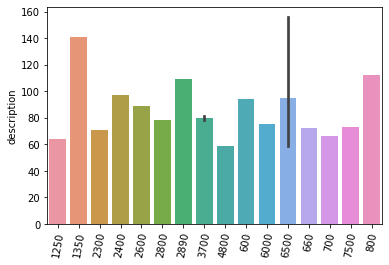

In [293]:
#plt.figure
sns.barplot(rdo33.head(20).values,rdo33.value_counts().head(20))
plt.xticks(rotation=80);